In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
train_data = pd.read_csv('data/dengue_features_train.csv')
train_data['total_cases'] = pd.read_csv('data/dengue_labels_train.csv')['total_cases']
print(train_data.shape)
train_data.head()

(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
list(train_data)

['city',
 'year',
 'weekofyear',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

# Attribute by attribute analysis
### Time
* The time interval is very big. Older instances might be a problem for predictor models to train on.

In [11]:
min(train_data['week_start_date']), max(train_data['week_start_date'])

('1990-04-30', '2010-06-25')

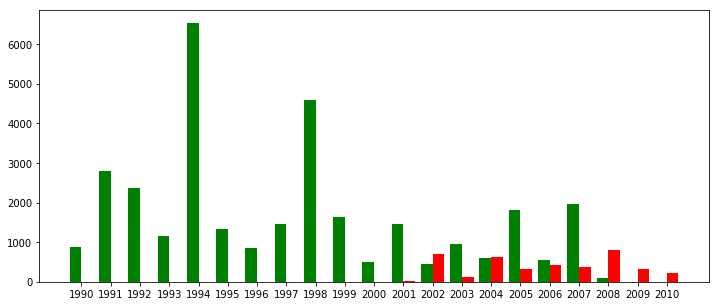

In [136]:
cases_by_year_sj = train_data[train_data['city'] == 'sj'][['year','total_cases']].groupby(by=['year']).sum()
cases_by_year_iq = train_data[train_data['city'] == 'iq'][['year','total_cases']].groupby(by=['year']).sum()
plt.figure(figsize=(12,5))
w=0.4
plt.bar(cases_by_year_iq.index.values+w, width=w, height=cases_by_year_iq['total_cases'], align='center', color='red')
plt.bar(cases_by_year_sj.index.values, width=w, height=cases_by_year_sj['total_cases'], align='center', color='green')
years = np.array(range(1990, 2011))
plt.xticks(years+w/2, years)
plt.show()

In [112]:
cases_by_year_sj.index.values, cases_by_year_iq.index.values


(array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]),
 array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]))